# **Project Goal:**

Analyze Netflix movie data and extract insights about movies from a particular decade.

# **1. Introduction**

---



*   Short description of Netflix dataset
*   Project objective
*   Tools used (pandas, numpy, matplotlib, seaborn)

In [ ]:
# 1. Imports & settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from

# Display settings for clearer outputs in Colab
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)
sns.set_style('whitegrid')


# **2. Load and Inspect Data**

---



*   Load CSV
*   Display first rows
*   Check missing values
*   Data types
*   Unique counts

In [ ]:
# 2. Load dataset
path = '/content/netflix_titles.csv'   # update if you put the file elsewhere in Colab
df = pd.read_csv(path)
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (8807, 12)


In [ ]:
# 3. Quick peek at the data
display(df.head(6))
display(df.tail(3))


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Ma...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe."


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies","Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals","A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."


In [ ]:
# 4. Column types and basic overview
print("Columns:", list(df.columns))
print("\nData types:")
display(df.dtypes)


Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Data types:


,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
# 5. Missing values summary
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)
missing_summary = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
display(missing_summary)


,missing_count,missing_pct
director,2634,29.91
country,831,9.44
cast,825,9.37
date_added,10,0.11
rating,4,0.05
duration,3,0.03
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00


In [ ]:
# 6. Useful unique counts and a few quick value counts
cols_of_interest = ['type','release_year','rating','country','director','listed_in']
for c in cols_of_interest:
    if c in df.columns:
        print(f"{c:12s} -> unique: {df[c].nunique(dropna=True)}")
print("\nCounts by 'type':")
display(df['type'].value_counts())
print("\nTop 10 most frequent titles (to check duplicates):")
display(df['title'].value_counts().head(10))


type         -> unique: 2
release_year -> unique: 74
rating       -> unique: 17
country      -> unique: 748
director     -> unique: 4528
listed_in    -> unique: 514

Counts by 'type':


,count
type,
Movie,6131
TV Show,2676



Top 10 most frequent titles (to check duplicates):


,count
title,
Zubaan,1
Dick Johnson Is Dead,1
Blood & Water,1
Ganglands,1
Jailbirds New Orleans,1
Kota Factory,1
Midnight Mass,1
You Don't Mess with the Zohan,1
You Changed My Life,1


In [ ]:
# 7. Preview of 'date_added' raw values (first few unique samples)
display(df['date_added'].dropna().unique()[:10])


array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       'September 22, 2021', 'September 21, 2021', 'September 20, 2021',
       'September 19, 2021', 'September 17, 2021', 'September 16, 2021',
       'September 15, 2021'], dtype=object)

# **3. Data Cleaning**

---



*   Convert `date_added` to datetime
*   Clean `duration` column
*   Handle missing values (director, country, rating)
*   Filter only movies (`type == 'Movie'`)

In [ ]:
# Filter to only movies
movies = df[df['type'] == 'Movie'].copy()

print("Movies dataset shape:", movies.shape)


Movies dataset shape: (6131, 12)


In [ ]:
# Convert to datetime
movies['date_added'] = pd.to_datetime(movies['date_added'], errors='coerce')

movies['date_added'].head()

,date_added
0,2021-09-25
6,2021-09-24
7,2021-09-24
9,2021-09-24
12,2021-09-23


In [ ]:
# Function to extract minutes
def extract_minutes(x):
    if isinstance(x, str) and "min" in x:
        return int(x.split()[0])
    return np.nan

# Apply the function
movies['duration_minutes'] = movies['duration'].apply(extract_minutes)

movies[['duration', 'duration_minutes']].head()


,duration,duration_minutes
0,90 min,90.0
6,91 min,91.0
7,125 min,125.0
9,104 min,104.0
12,127 min,127.0


In [ ]:
movies['director'] = movies['director'].fillna("Unknown")
movies['country'] = movies['country'].fillna("Unknown")
movies['rating'] = movies['rating'].fillna("Not Rated")

In [ ]:
movies['decade'] = (movies['release_year'] // 10) * 10

movies[['release_year', 'decade']].head()

,release_year,decade
0,2020,2020
6,2021,2020
7,1993,1990
9,2021,2020
12,2021,2020


In [ ]:
print("Cleaned movies dataset shape:", movies.shape)
movies.head()

# Check remaining missing values
movies.isna().sum()


Cleaned movies dataset shape: (6131, 14)


,0
show_id,0
type,0
title,0
director,0
cast,475
country,0
date_added,0
release_year,0
rating,0
duration,3


# **4. Exploratory Data Analysis (EDA)**

---


**4.1. Movies by decade**
*   Extract decade from `release_year`
*   Bar chart: number of movies per decade

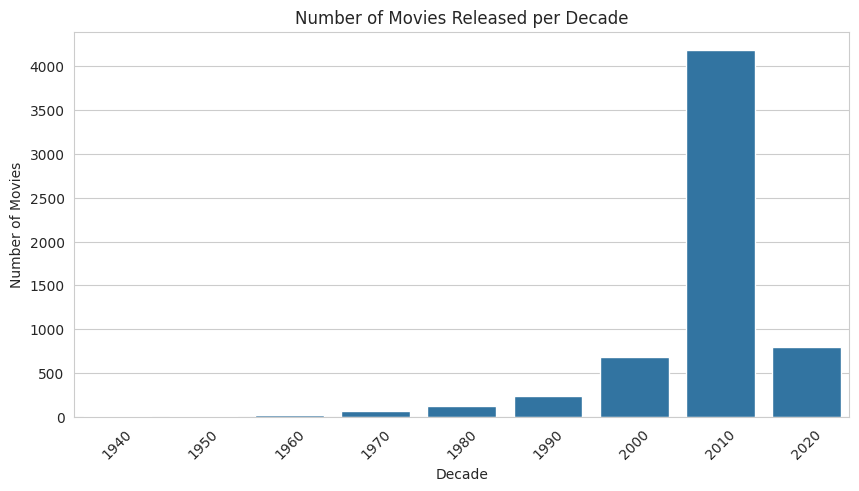

In [ ]:
# Count movies by decade
decade_counts = movies['decade'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=decade_counts.index, y=decade_counts.values)
plt.title("Number of Movies Released per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


**4.2. Movie duration**
*   Convert `duration` to minutes
*   Histogram / KDE plot of durations

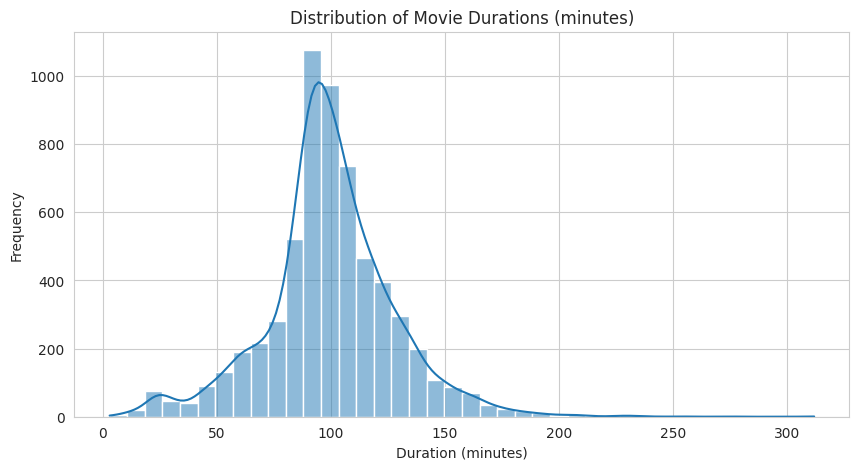

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(movies['duration_minutes'].dropna(), bins=40, kde=True)
plt.title("Distribution of Movie Durations (minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

**4.3. Top genres**
*   Split `listed_in` column
*   Count most common genres
*   Bar chart


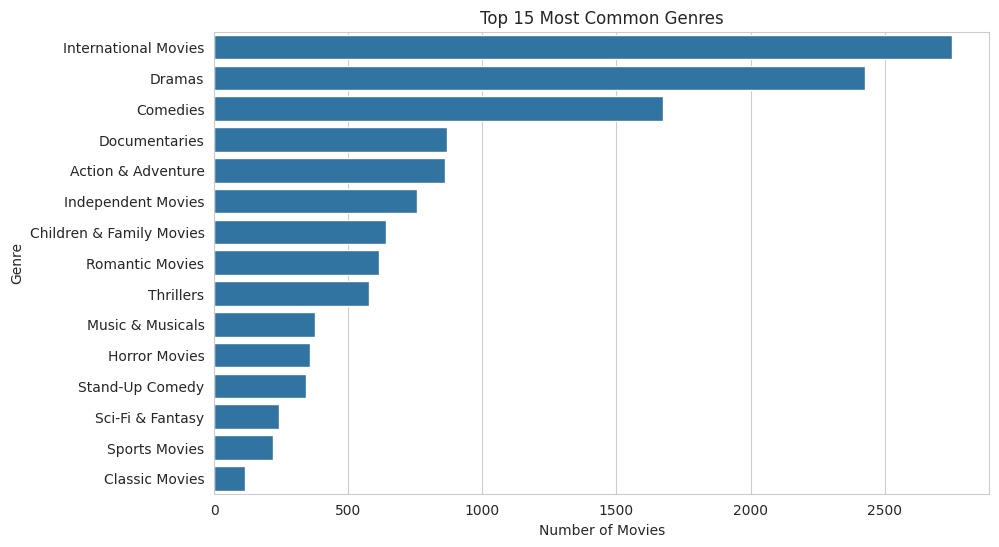

In [ ]:
# Split genres into individual rows
genre_series = movies['listed_in'].str.split(', ').explode()

# Count most common genres
top_genres = genre_series.value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title("Top 15 Most Common Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

**4.4. Ratings distribution**
*   Countplot of rating categories (PG-13, TV-MA, etc.)

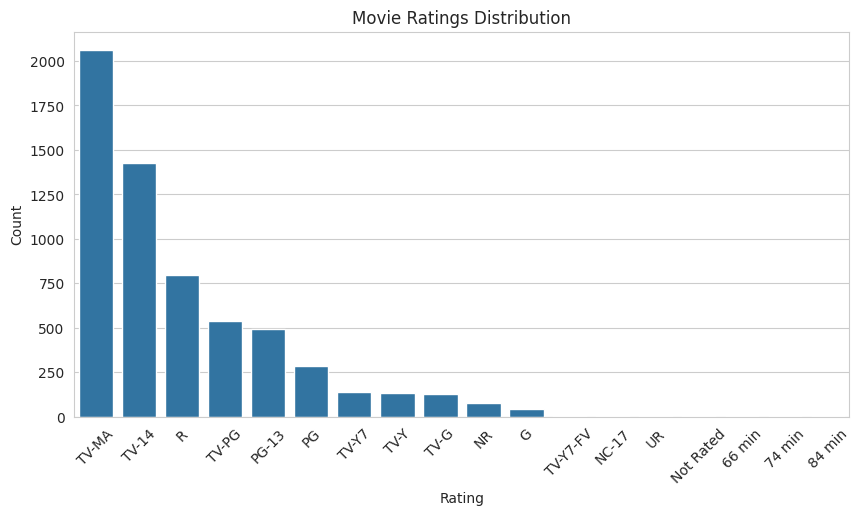

In [ ]:
rating_counts = movies['rating'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title("Movie Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**4.5. Top countries producing movies**
*   Extract country list
*   Bar chart of top 10

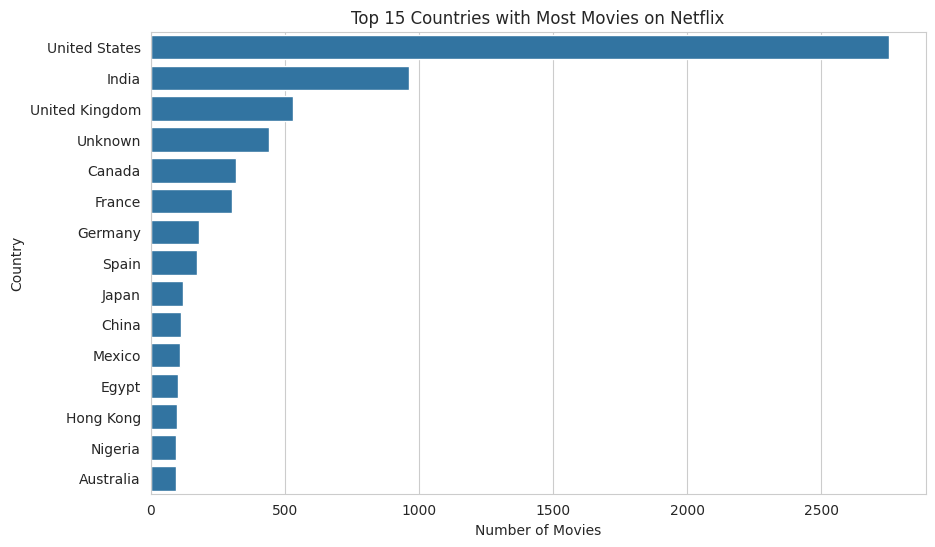

In [ ]:
# Split by country
country_series = movies['country'].str.split(', ').explode()
top_countries = country_series.value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 15 Countries with Most Movies on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()


**4.6. Directors with the most movies**
*   Bar chart top 15

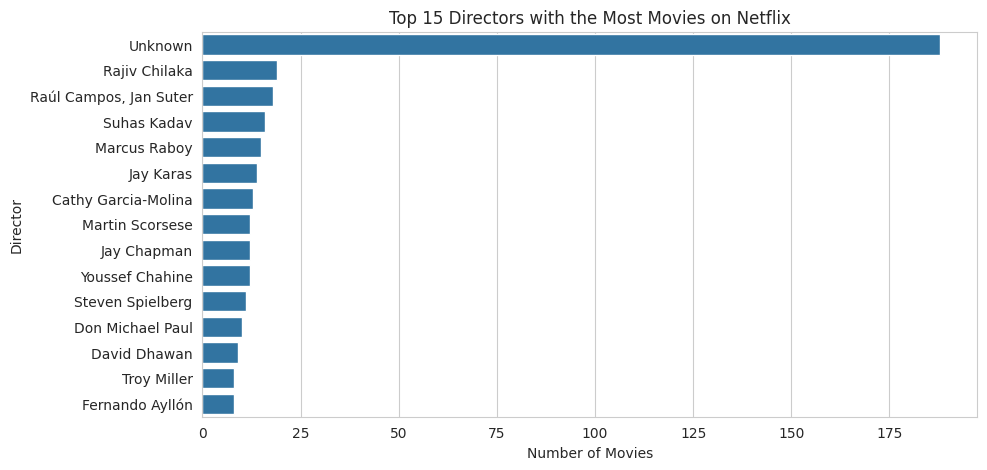

In [ ]:
top_directors = movies['director'].value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title("Top 15 Directors with the Most Movies on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()


# **5. Insights and Conclusion**

---

## 1. Movies per decade
- Netflix offers movies spanning many decades, but the **2010s are the most represented decade**.
- This reflects Netflix’s focus on more recent productions and content partnerships formed after 2010.

---

## 2. Movie duration patterns
- Most movies fall between **80 and 120 minutes**, with a strong peak around ~90 minutes.
- Very long movies (over 150 minutes) are relatively rare on the platform.

---

## 3. Genre analysis
- The most common genres include:
  - **Dramas**
  - **Comedies**
  - **Documentaries**
- International genres (Asian, Latin American, European cinema) appear frequently due to Netflix’s global content strategy.

---

## 4. Ratings distribution
- The most common ratings are:
  - **TV-MA** (mature audiences)
  - **TV-14**  
- This suggests the majority of Netflix movies target **teen and adult audiences** rather than children.

---

## 5. Country insights
- The United States produces the largest number of movies on Netflix.
- However, India, the UK, Japan, and several European countries also contribute substantially.
- This indicates Netflix’s effort to diversify and localize content.

---

## 6. Directors
- Many movies list **“Unknown”** for the director, likely because Netflix’s metadata is inconsistent.
- Among known directors, only a handful appear more than 5 times, confirming that Netflix content comes from a wide variety of creators.

---

# 📌 Final Conclusion

Netflix’s movie catalog is dominated by **recent productions**, mainly from **2010 onward**, with a strong presence of international genres. The platform emphasizes **modern, globally diverse content**, while maintaining a focus on dramas, comedies, and documentaries — genres that appeal to broad audiences.

This exploratory analysis provides a solid foundation for deeper studies, such as:
- Trend evolution of genres over time  
- Predicting movie popularity  
- Clustering movies by metadata  
- Building recommendation systems